# Course Outline: Signal Processing in Geophysics using Python

## Part 1: Introduction to Signals

### 1.1 What is a Signal?
#### Conceptual Overview:

Definition: A signal is a representation of physical quantities that can convey information.
Types of Signals:
Analog Signals: Continuous signals that vary smoothly over time.
Digital Signals: Discrete signals sampled at intervals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(0, 1, 500)
freq = 5 
amp = 1
signal = amp * np.sin(2 * np.pi * freq * t)

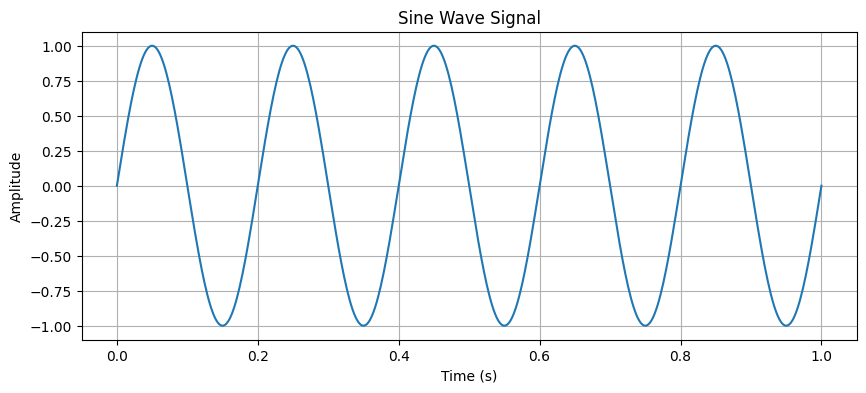

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Sine Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show();

In [9]:
t = np.linspace(0, 1, 500)
freq = 5 
amp = 1
signal = amp * np.sin(2 * np.pi * freq * t)

# add noise to signal
noise = 0.5 * amp * np.random.normal(size=t.size)

signal_noisy = signal + noise

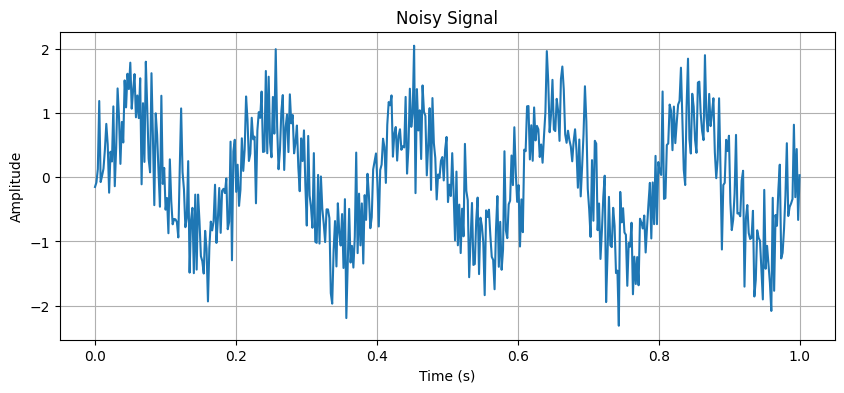

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(t, signal_noisy)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show();

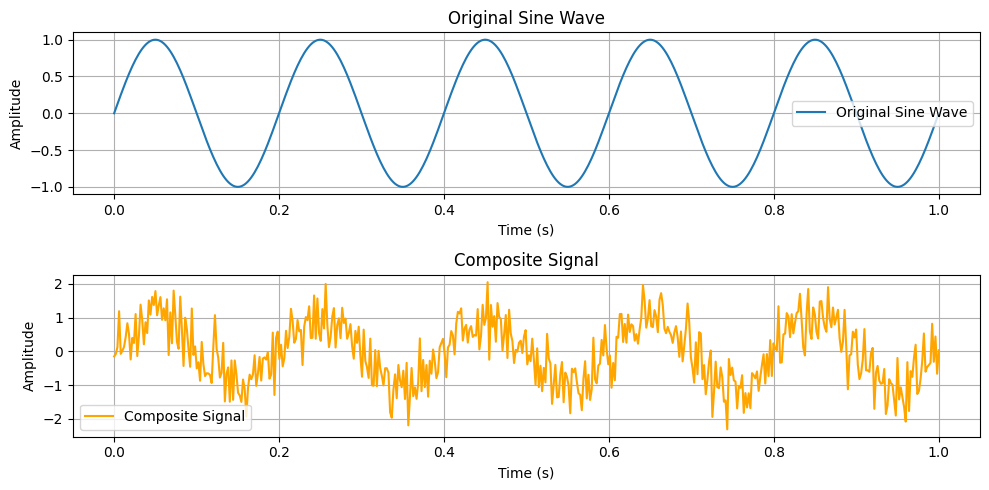

In [13]:
# Advanced Plotting: Multiple signals
plt.figure(figsize=(10, 5))

# Plotting the original sine wave
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Sine Wave')
plt.title('Original Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plotting the composite signal
plt.subplot(2, 1, 2)
plt.plot(t, signal_noisy, label='Composite Signal', color='orange')
plt.title('Composite Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Part 4: Filters in Signal Processing and Denoising Gaussian Noise

### 4.1 What are Low-Pass, High-Pass, and Band-Pass Filters?

#### Conceptual Overview:

- **Filters**: Tools used in signal processing to selectively pass or attenuate certain frequencies in a signal.

#### Low-Pass Filter (LPF):

- **Definition**: Allows frequencies below a certain cutoff frequency to pass through and attenuates frequencies higher than the cutoff.
- **Use Case**: Smoothing signals, removing high-frequency noise.

#### High-Pass Filter (HPF):

- **Definition**: Allows frequencies above a certain cutoff frequency to pass through and attenuates frequencies below the cutoff.
- **Use Case**: Removing low-frequency components, such as drifts or trends.

#### Band-Pass Filter (BPF):

- **Definition**: Allows frequencies within a certain range (band) to pass through and attenuates frequencies outside this range.
- **Use Case**: Isolating specific frequency components, such as those in a particular band.

#### Mathematical Representations:

- Filters are often implemented using convolution with a kernel (in the time domain) or multiplication with a transfer function (in the frequency domain).

### 4.2 Denoising Gaussian Noise Using Filters

#### Conceptual Overview:

- **Denoising**: The process of removing noise from a signal. Gaussian noise can be mitigated using filters by targeting the noise's frequency characteristics.

#### Denoising Techniques:

- **Low-Pass Filtering**: Effective for removing high-frequency noise from a signal.
- **High-Pass Filtering**: Useful for removing low-frequency noise or drifts, often not as effective for Gaussian noise, which typically affects higher frequencies.
- **Band-Pass Filtering**: Useful when the noise affects both low and high frequencies, isolating the signal within a certain frequency range.


In [15]:
from scipy.signal import butter, filtfilt

In [16]:
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = signal + noise

In [17]:
# filter design
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    
    
    b, a = butter(order, normal_cutoff, btype='low' )
    return b, a


In [18]:
# apply our filter
fs = 500 # sampling freq
cutoff = 10
b, a = butter_lowpass(cutoff, fs)
filtered_signal = filtfilt(b, a, noisy_signal)

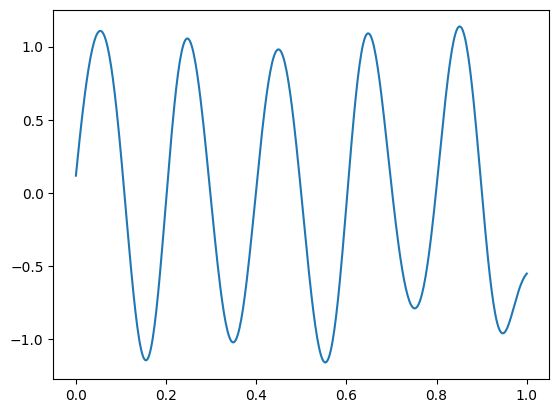

In [21]:
plt.plot(t, filtered_signal);

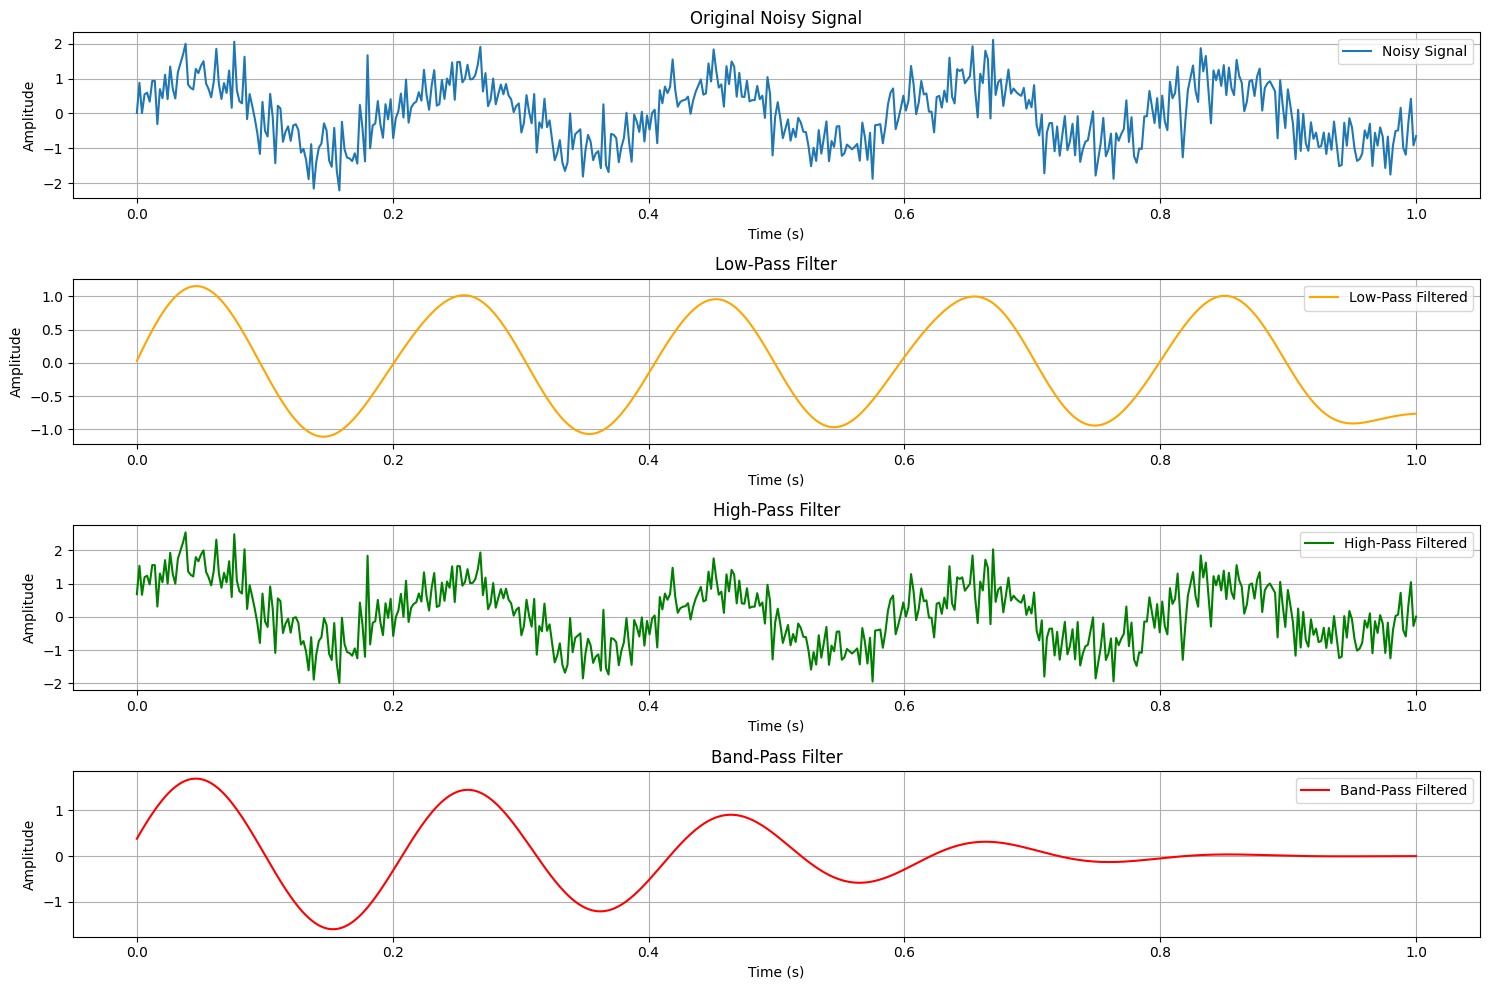

In [22]:
# Generate a sample signal: A sine wave with Gaussian noise
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = signal + noise

# Filter design: Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply low-pass filter
fs = 500  # Sampling frequency
cutoff = 10  # Cutoff frequency
b, a = butter_lowpass(cutoff, fs)
filtered_signal_lpf = filtfilt(b, a, noisy_signal)

# Apply high-pass filter
cutoff_high = 1  # Cutoff frequency for high-pass
b, a = butter_highpass(cutoff_high, fs)
filtered_signal_hpf = filtfilt(b, a, noisy_signal)

# Apply band-pass filter
lowcut = 4
highcut = 6
b, a = butter_bandpass(lowcut, highcut, fs)
filtered_signal_bpf = filtfilt(b, a, noisy_signal)

# Plotting results
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Original Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal_lpf, label='Low-Pass Filtered', color='orange')
plt.title('Low-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal_hpf, label='High-Pass Filtered', color='green')
plt.title('High-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, filtered_signal_bpf, label='Band-Pass Filtered', color='red')
plt.title('Band-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


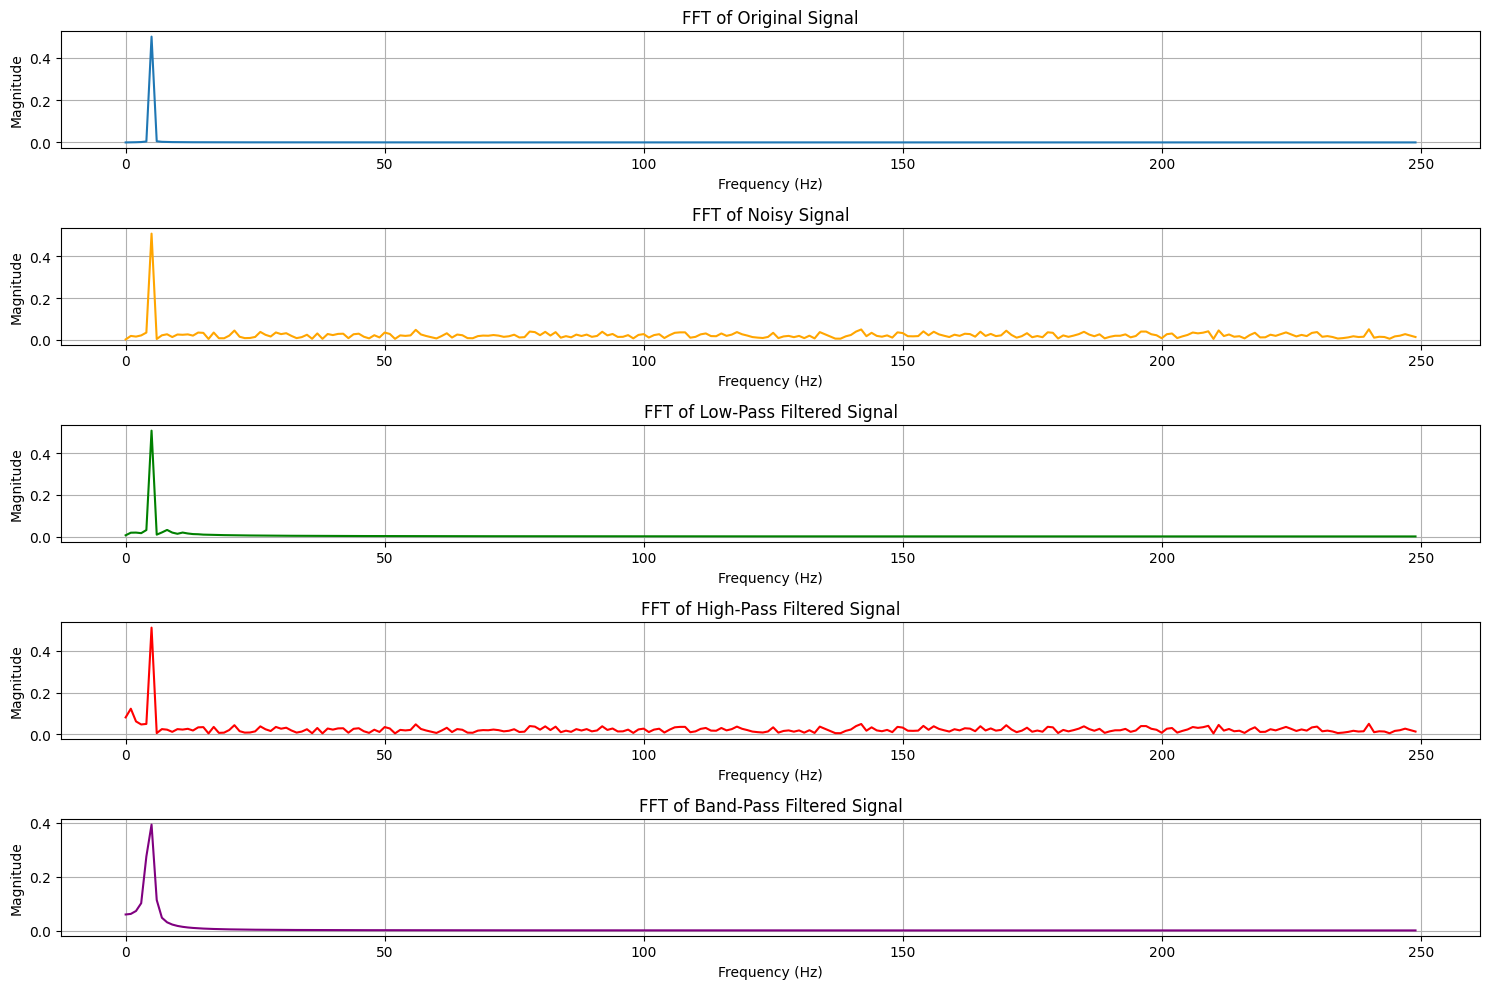

In [23]:
# Function to calculate FFT and its corresponding frequency bins
def compute_fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_vals = np.abs(fft_vals) / N  # Normalize amplitude
    fft_freqs = np.fft.fftfreq(N, 1/fs)
    return fft_freqs[:N // 2], fft_vals[:N // 2]  # Return one-sided spectrum

# Sampling frequency
fs = 500

# Original signal's FFT
fft_freqs_orig, fft_vals_orig = compute_fft(signal, fs)

# Noisy signal's FFT
fft_freqs_noisy, fft_vals_noisy = compute_fft(noisy_signal, fs)

# Low-pass filtered signal's FFT
fft_freqs_lpf, fft_vals_lpf = compute_fft(filtered_signal_lpf, fs)

# High-pass filtered signal's FFT
fft_freqs_hpf, fft_vals_hpf = compute_fft(filtered_signal_hpf, fs)

# Band-pass filtered signal's FFT
fft_freqs_bpf, fft_vals_bpf = compute_fft(filtered_signal_bpf, fs)

# Plotting the FFT results
plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.plot(fft_freqs_orig, fft_vals_orig, label='Original Signal FFT')
plt.title('FFT of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(fft_freqs_noisy, fft_vals_noisy, label='Noisy Signal FFT', color='orange')
plt.title('FFT of Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(fft_freqs_lpf, fft_vals_lpf, label='Low-Pass Filtered Signal FFT', color='green')
plt.title('FFT of Low-Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(fft_freqs_hpf, fft_vals_hpf, label='High-Pass Filtered Signal FFT', color='red')
plt.title('FFT of High-Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(fft_freqs_bpf, fft_vals_bpf, label='Band-Pass Filtered Signal FFT', color='purple')
plt.title('FFT of Band-Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [24]:
t = np.linspace(0, 1, 500, endpoint=False)
freq1, freq2 = 5, 20  # Frequencies of the sine waves
signal = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

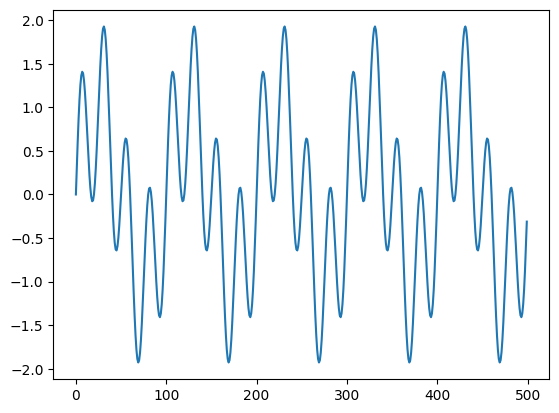

In [25]:
plt.plot(signal)

In [26]:
# Applying FFT
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_result), t[1] - t[0])

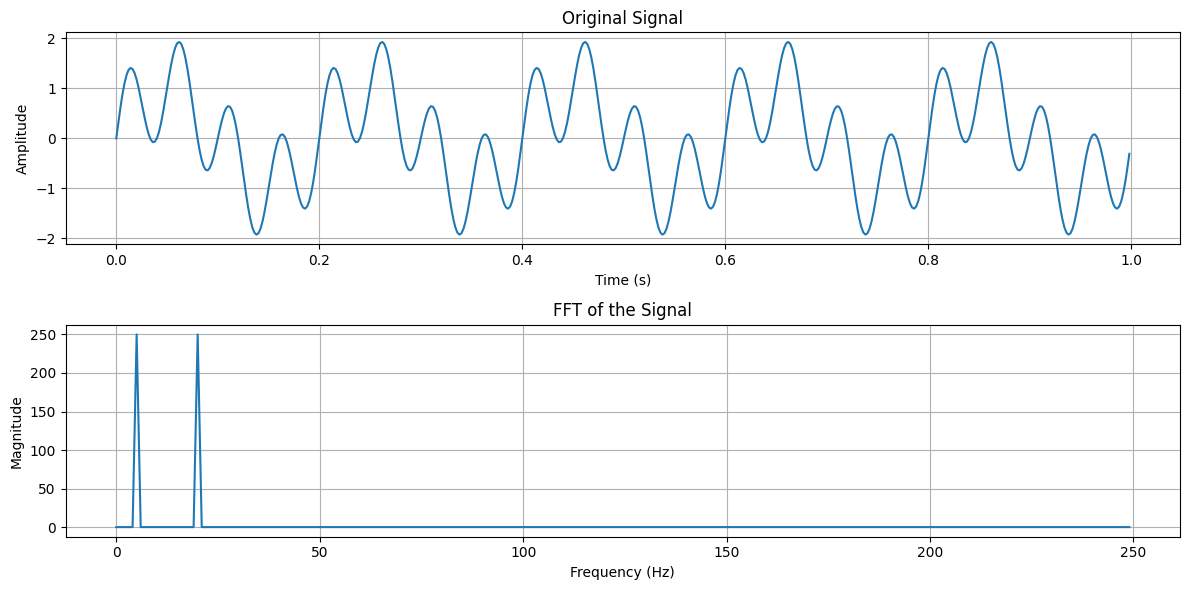

In [27]:

# Plotting the signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
def ricker_wavelet(t, a):
    part1 = 2 / (np.sqrt(3**a) * (np.pi**0.25))
    part2 = (1 - (t**2) / (a**2))
    part3 =np.exp(-t**2 / (2 * a**2))
    return part1 * part2 * part3
    

In [29]:
t = np.linspace(-5, 5, 1000)
a = 1
wavelet = ricker_wavelet(t, a)

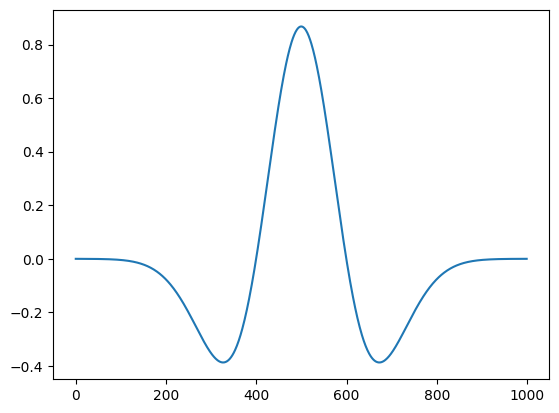

In [30]:
plt.plot(wavelet)

In [31]:
n_sample = 200
undergournd = np.zeros(n_sample)
undergournd[50] = 0.5
undergournd[100] = -0.3
undergournd[150] = 0.7


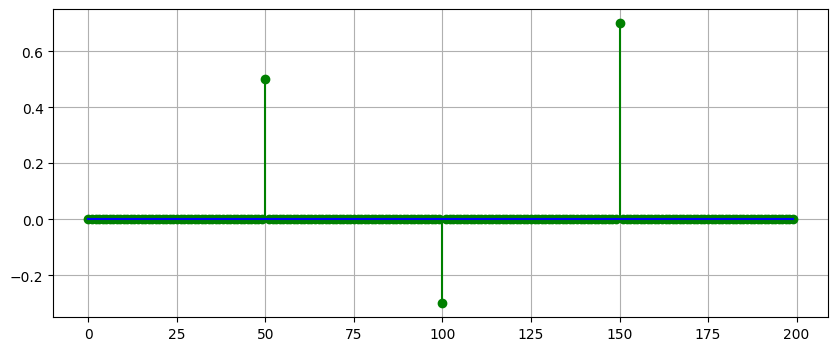

In [37]:
plt.figure(figsize=(10, 4))
plt.stem(undergournd, linefmt='g-', basefmt='b-')

plt.grid()

In [34]:
def ricker(frequency, length, dt):
    t = np.linspace(-length / 2, length / 2, int(length / dt))
    y = (1 - 2 * (np.pi ** 2) * (frequency ** 2) * (t ** 2)) * np.exp(
        -(np.pi ** 2) * (frequency ** 2) * (t ** 2))
    return t, y

In [35]:
t, wavelet1 = ricker(25, 0.256, 0.004)

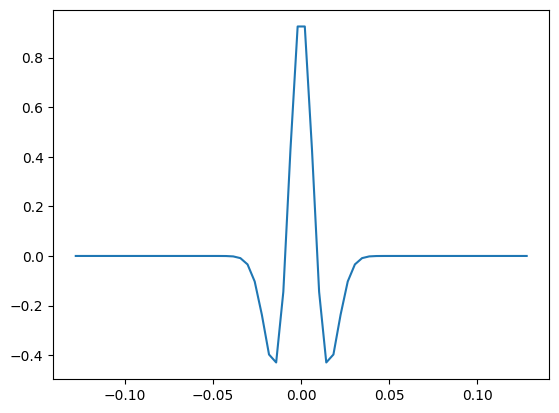

In [36]:
plt.plot(t, wavelet1)

In [38]:
relect_wave = np.convolve(wavelet1, undergournd)

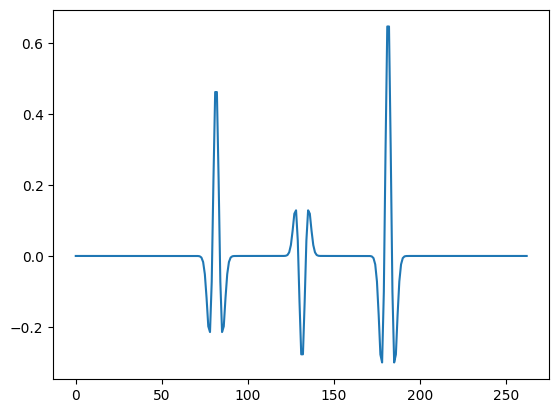

In [39]:
plt.plot(relect_wave)

**Linear Inversion**:

- **Forward Model**: 
$d = Gm$
- $d$: Data vector (observations)
- $G$: Forward operator (relates the model to the data)
- $m$: Model


- **Inverse Model**: 
$m = (G^T G)^{-1} G^T d$
This formula represents the least-squares solution, where $G^T$ is the transpose of $G$ and $(G^T G)^{-1}$ is the inverse of the matrix product.

In [40]:
# x = np.convolve(np.eye(n_samples)[i], wavelet1, mode='same')
# G = [x[i] for i in range(n_samples)]
# pinv = np.linalg.pinv(G)

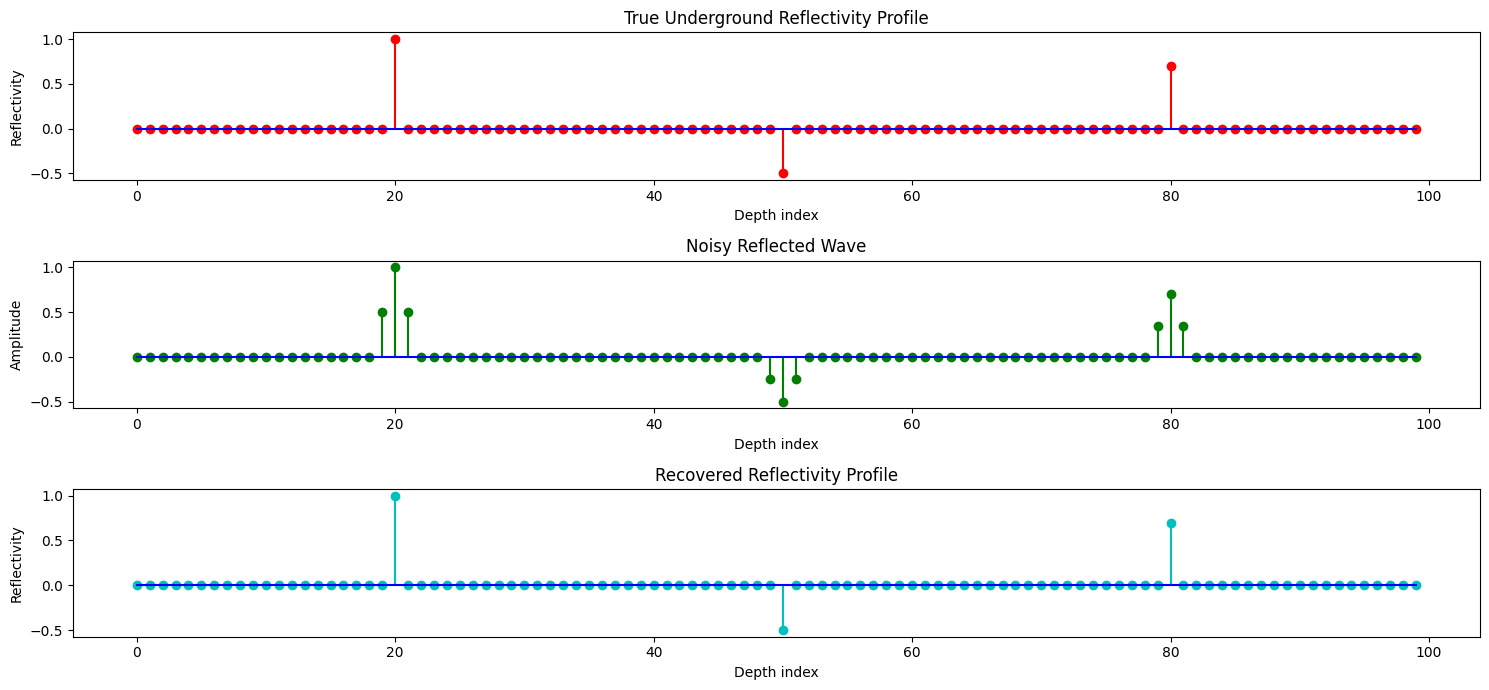

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
wavelet = np.array([0.5, 1.0, 0.5])  # Example wavelet
n_samples = 100  # Number of samples for reflectivity profile
underground_reflectivity = np.zeros(n_samples)
underground_reflectivity[20] = 1.0
underground_reflectivity[50] = -0.5
underground_reflectivity[80] = 0.7

# Create noisy reflected wave by convolving wavelet with true reflectivity and adding noise
reflected_wave = np.convolve(underground_reflectivity, wavelet, mode='same')
noise = np.random.normal(0, 0.1, reflected_wave.shape) * 0
noisy_reflected_wave = reflected_wave + noise

# Pseudo-inverse method to recover the reflectivity profile
# Calculate the convolution matrix using np.convolve for each impulse in the reflectivity profile
G_pinv = np.linalg.pinv(np.array([np.convolve(np.eye(n_samples)[i],
                                              wavelet, mode='same') for i in range(n_samples)]).T)
recovered_reflectivity = G_pinv @ noisy_reflected_wave

# Plotting the true, recovered, and noisy reflectivity
plt.figure(figsize=(15, 7))

plt.subplot(3, 1, 1)
plt.stem(underground_reflectivity, linefmt="r-", basefmt="b-")
plt.title('True Underground Reflectivity Profile')
plt.xlabel('Depth index')
plt.ylabel('Reflectivity')

plt.subplot(3, 1, 2)
plt.stem(noisy_reflected_wave, linefmt="g-", basefmt="b-")
plt.title('Noisy Reflected Wave')
plt.xlabel('Depth index')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.stem(recovered_reflectivity, linefmt="c-", basefmt="b-")
plt.title('Recovered Reflectivity Profile')
plt.xlabel('Depth index')
plt.ylabel('Reflectivity')

plt.tight_layout()
plt.show()


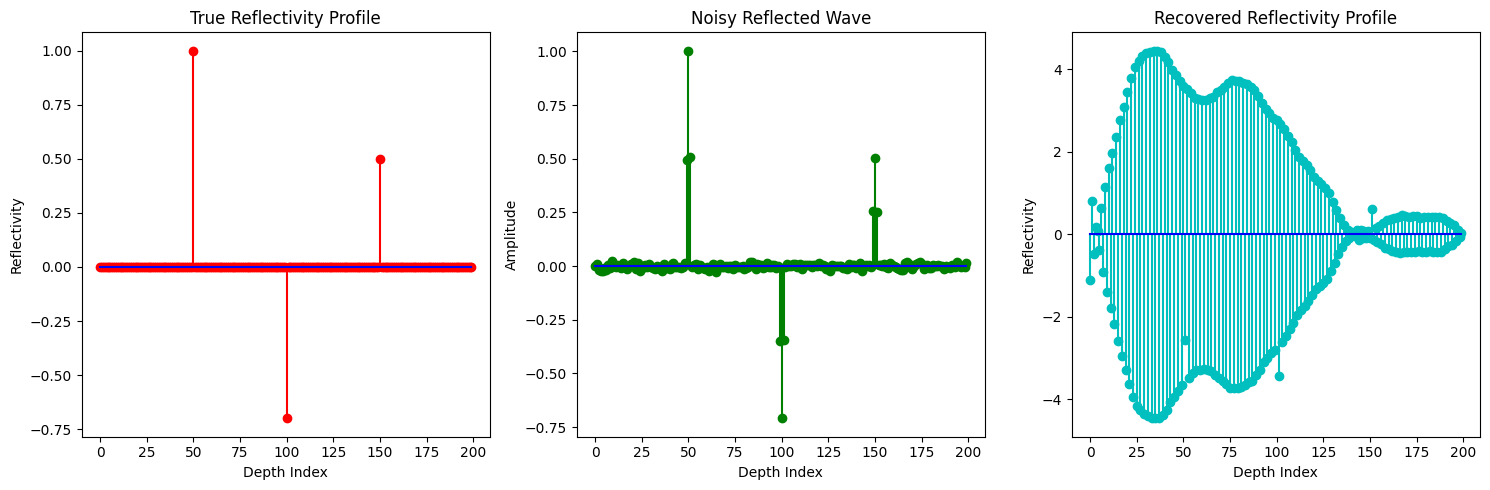

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the wavelet (example)
wavelet = np.array([0.5, 1.0, 0.5])

# Define the underground reflectivity profile (example)
n_samples = 200
underground_reflectivity = np.zeros(n_samples)
underground_reflectivity[50] = 1.0
underground_reflectivity[100] = -0.7
underground_reflectivity[150] = 0.5

# Generate noisy reflected wave
reflected_wave = np.convolve(underground_reflectivity, wavelet, mode='same')
noise = np.random.normal(0, 0.1, reflected_wave.shape)
noisy_reflected_wave = reflected_wave + 0.1* noise

# Define the corrected convolution matrix function
def convolution_matrix(wavelet, n_samples):
    length = len(wavelet)
    conv_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        end_index = i + length
        if end_index > n_samples:
            conv_matrix[i, i:n_samples] = wavelet[:n_samples-i]
        else:
            conv_matrix[i, i:end_index] = wavelet
    return conv_matrix

# Create the convolution matrix and perform the inversion
G = convolution_matrix(wavelet, n_samples)
G_pinv = np.linalg.pinv(G)
recovered_reflectivity = G_pinv @ noisy_reflected_wave

# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.stem(underground_reflectivity, linefmt="r-", basefmt="b-")
plt.title('True Reflectivity Profile')
plt.xlabel('Depth Index')
plt.ylabel('Reflectivity')

plt.subplot(1, 3, 2)
plt.stem(noisy_reflected_wave, linefmt="g-", basefmt="b-")
plt.title('Noisy Reflected Wave')
plt.xlabel('Depth Index')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 3)
plt.stem(recovered_reflectivity, linefmt="c-", basefmt="b-")
plt.title('Recovered Reflectivity Profile')
plt.xlabel('Depth Index')
plt.ylabel('Reflectivity')

plt.tight_layout()
plt.show()


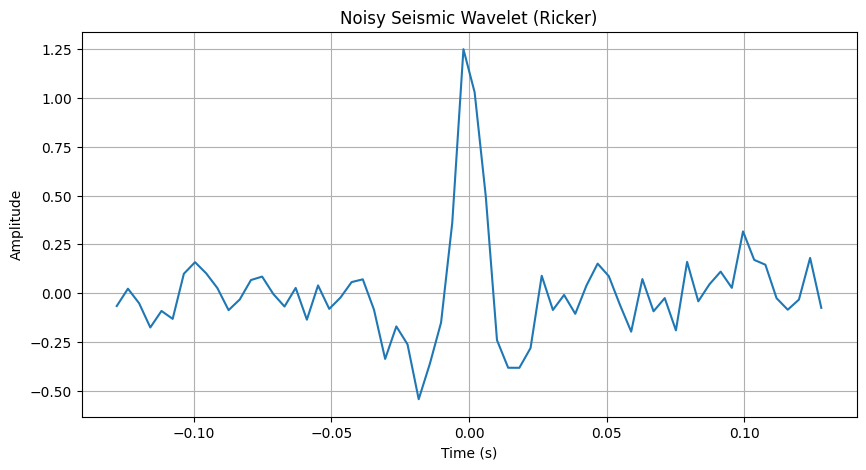

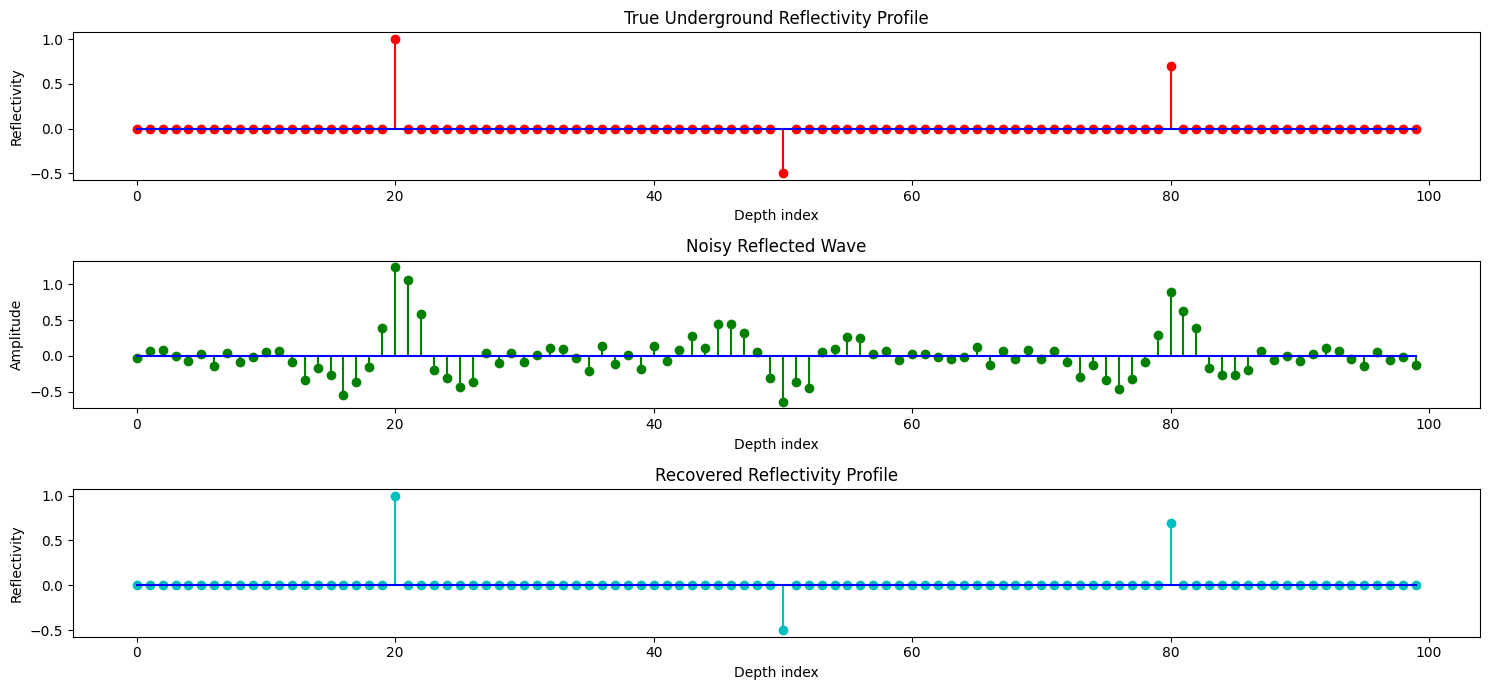

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Ricker wavelet function
def ricker(frequency, length, dt):
    t = np.linspace(-length / 2, length / 2, int(length / dt))
    y = (1 - 2 * (np.pi ** 2) * (frequency ** 2) * (t ** 2)) * np.exp(
        -(np.pi ** 2) * (frequency ** 2) * (t ** 2))
    return t, y

# Generate a Ricker wavelet
t, wavelet1 = ricker(25, 0.256, 0.004)

# Add noise to the wavelet
noise = np.random.normal(0, 0.1, wavelet1.shape)
noisy_wavelet = wavelet1 + noise

# Plotting the noisy wavelet
plt.figure(figsize=(10, 5))
plt.plot(t, noisy_wavelet)
plt.title('Noisy Seismic Wavelet (Ricker)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Example data
n_samples = 100  # Number of samples for reflectivity profile
underground_reflectivity = np.zeros(n_samples)
underground_reflectivity[20] = 1.0
underground_reflectivity[50] = -0.5
underground_reflectivity[80] = 0.7

# Create reflected wave by convolving noisy wavelet with true reflectivity
reflected_wave = np.convolve(underground_reflectivity, noisy_wavelet, mode='same')

# Pseudo-inverse method to recover the reflectivity profile
# Calculate the convolution matrix using np.convolve for each impulse in the reflectivity profile
G_pinv = np.linalg.pinv(np.array([np.convolve(np.eye(n_samples)[i], noisy_wavelet, mode='same') for i in range(n_samples)]).T)
recovered_reflectivity = G_pinv @ reflected_wave

# Plotting the true, recovered, and reflected waves
plt.figure(figsize=(15, 7))

plt.subplot(3, 1, 1)
plt.stem(underground_reflectivity, linefmt="r-", basefmt="b-")
plt.title('True Underground Reflectivity Profile')
plt.xlabel('Depth index')
plt.ylabel('Reflectivity')

plt.subplot(3, 1, 2)
plt.stem(reflected_wave, linefmt="g-", basefmt="b-")
plt.title('Noisy Reflected Wave')
plt.xlabel('Depth index')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.stem(recovered_reflectivity, linefmt="c-", basefmt="b-")
plt.title('Recovered Reflectivity Profile')
plt.xlabel('Depth index')
plt.ylabel('Reflectivity')

plt.tight_layout()
plt.show()


In [48]:
from obspy.io.segy.segy import _read_segy

In [49]:
# pip install obsy

In [50]:
# Load SEG-Y file
sgyfile = 'Stack denoise.segy'
seismic_data = _read_segy(sgyfile)

In [51]:
print(seismic_data.traces[0].header)

trace_sequence_number_within_line: 0
trace_sequence_number_within_segy_file: 1
original_field_record_number: 107
trace_number_within_the_original_field_record: 1
energy_source_point_number: 100
ensemble_number: 2002
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 15
receiver_group_elevation: 3833000
surface_elevation_at_source: 3928000
source_depth_below_surface: 180000
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: -10000
scalar_to_be_applied_to_all_coordinates: -100
source_coordinate_x: 99459513
source_coordinate_y: 998830200
group_coordinate_x: 99458881
group_coordinate_y: 998828800
coordinate_units: 3
weathering_velocity: 0
subweathering_veloc

In [52]:
num_traces = len(seismic_data.traces)
print(num_traces)

858


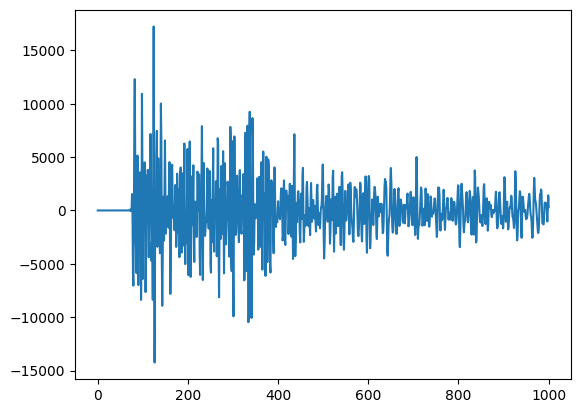

In [56]:
mytrace = seismic_data.traces[12].data

plt.plot(mytrace)

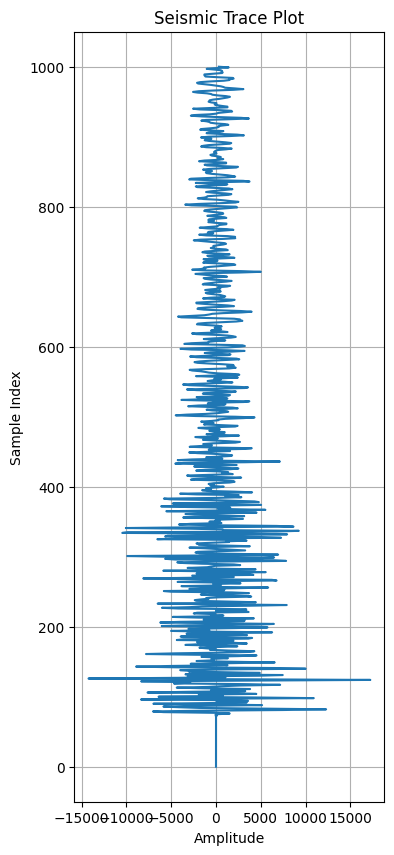

In [60]:
plt.figure(figsize=(4, 10))
plt.plot(mytrace, range(len(mytrace)))
plt.title("Seismic Trace Plot")
plt.xlabel("Amplitude")
plt.ylabel("Sample Index")
plt.grid(True)

# Invert the y-axis to have the 0 sample index at the top (optional)
# plt.gca().invert_yaxis()
plt.savefig('fig1.png')

# Show the plot
plt.show()


In [61]:
data_matrix = np.array([trace.data for trace in seismic_data.traces]).T

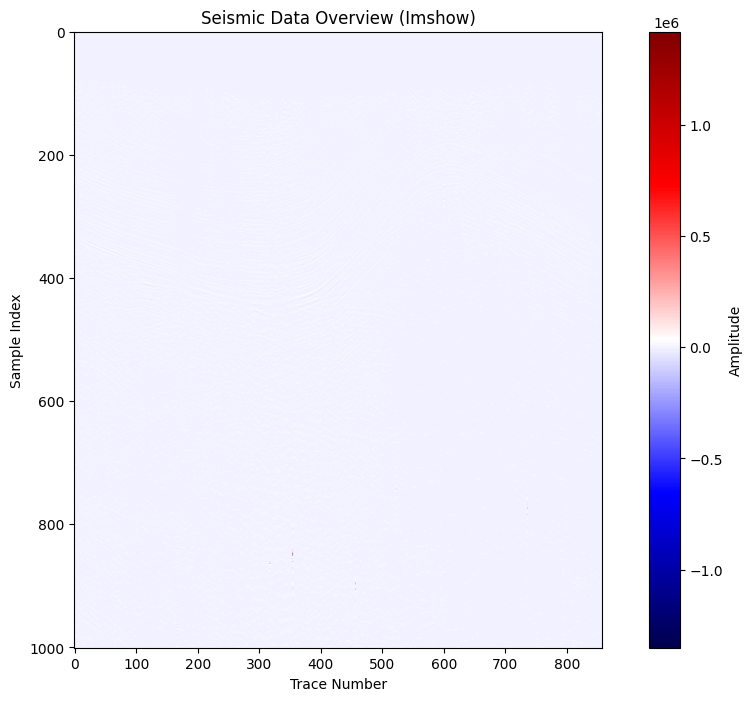

In [63]:
# Visualize the data using imshow
plt.figure(figsize=(12, 8))
plt.imshow(data_matrix, cmap='seismic')
plt.colorbar(label='Amplitude')
plt.title("Seismic Data Overview (Imshow)")
plt.xlabel("Trace Number")
plt.ylabel("Sample Index")
plt.show()

In [64]:
import segyio

In [65]:
# pip install segyio

In [66]:
def apply_agc(trace, window_length):
    agc_trace = np.zeros_like(trace)
    half_window = window_length // 2

    for i in range(len(trace)):
        start = max(i - half_window, 0)
        end = min(i + half_window, len(trace))

        rms_amplitude = np.sqrt(np.abs(np.mean(trace[start:end] ** 1)))

        if rms_amplitude > 0:
            agc_trace[i] = trace[i] / rms_amplitude
        else:
            agc_trace[i] = 0

    return agc_trace

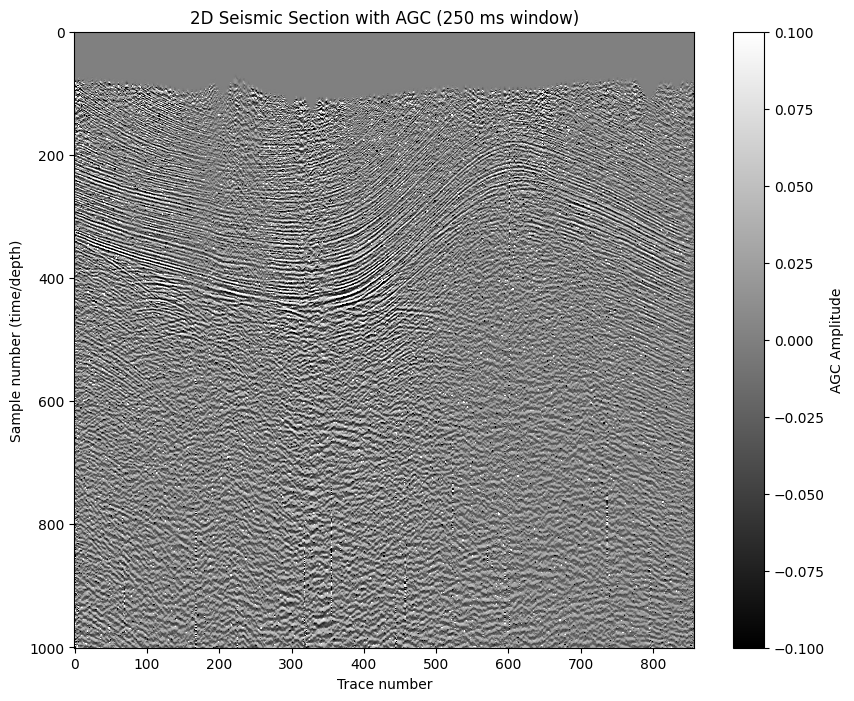

In [69]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Open the SEGY file
segyfile = 'Stack denoise.segy'
with segyio.open(segyfile, "r", ignore_geometry=True) as f:
    seismic_data = np.array([trace for trace in f.trace.raw[:]])

    # Normalize the seismic data
    seismic_data_normalized = seismic_data / np.max(np.abs(seismic_data))

    # Define the AGC window length (250 ms)
    sampling_interval_ms = segyio.tools.dt(f) / 1000  # convert from microseconds to milliseconds
    window_length_samples = int(10 / sampling_interval_ms)

    # Apply AGC to the seismic data
    def apply_agc(trace, window_length):
        agc_trace = np.zeros_like(trace)
        half_window = window_length // 2

        for i in range(len(trace)):
            start = max(i - half_window, 0)
            end = min(i + half_window, len(trace))

            rms_amplitude = np.sqrt(np.abs(np.mean(trace[start:end] ** 1)))

            if rms_amplitude > 0:
                agc_trace[i] = trace[i] / rms_amplitude
            else:
                agc_trace[i] = 0

        return agc_trace

    seismic_data_agc = np.array([apply_agc(trace, window_length_samples) for trace in seismic_data_normalized])

    
    

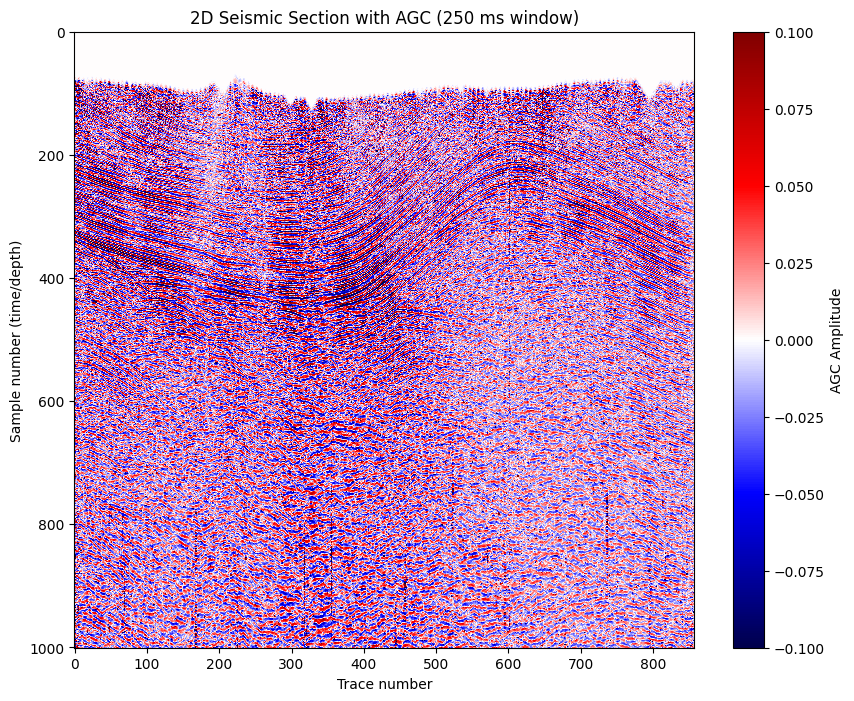

In [71]:

# Plot the AGC-applied seismic section
plt.figure(figsize=(10, 8))
plt.imshow(seismic_data_agc.T, cmap='seismic', aspect='auto', vmin=-0.1, vmax=0.1)
plt.colorbar(label='AGC Amplitude')
plt.title('2D Seismic Section with AGC (250 ms window)')
plt.xlabel('Trace number')
plt.ylabel('Sample number (time/depth)')
plt.show()


In [ ]:
with open(file) as myfile:
    